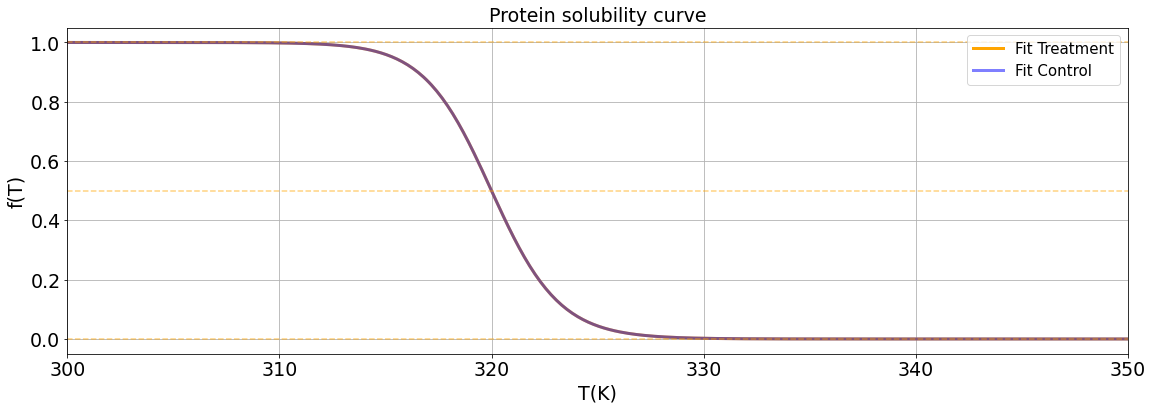

In [2]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to plot the graph
def plot_graph():
    global canvas, ax

    # Clear the previous plot
    ax.clear()

    try:
        # Get parameters from sliders
        a = a_slider.get()
        b = b_slider.get()
        k = k_slider.get()
        l = l_slider.get()
        t = t_slider.get()

        # Generate x values
        x = np.linspace(300, 350, 400)

        # Define the first equation
        y1 = (((1 - k) / (1 + np.exp((a - (a * b) / x)))) +
              (k / (1 + np.exp((l - (b * l) / x - (t * l) / x)))))

        # Define the second equation
        y2 = (1 / (1 + np.exp(np.abs(a) - ((np.abs(a) * b) / x))))

        # Plot the first graph
        ax.plot(x, y1, color='orange', linewidth=3, label='Fit Treatment')

        # Plot the second graph
        ax.plot(x, y2, color='blue', linewidth=3, label='Fit Control', alpha = 0.5)

        # Plot the second graph
        plt.hlines(0, 300, 350, color='orange', linestyles='--', alpha = 0.5)
        plt.hlines(1, 300, 350, color='orange', linestyles='--', alpha = 0.5)
        plt.hlines(0.5, 300, 350, color='orange', linestyles='--', alpha = 0.5)

        # Set labels, title, and limits
        ax.set_xlabel('T(K)', fontsize=19)
        ax.set_ylabel('f(T)', fontsize=19)
        ax.set_title('Protein solubility curve', fontsize=19)
        ax.set_xlim([300, 350])
        ax.set_ylim([-0.05, 1.05])
        # ax.set_aspect(aspect=0.2)  # Set aspect ratio (x/y = 5/1)
        ax.grid()

        # Set font sizes for tick labels
        ax.tick_params(axis='both', which='major', labelsize=19)

        # Add legend
        ax.legend(fontsize=15)

        # Draw the updated plot
        canvas.draw()

        # Clear any previous error message
        error_label.config(text="")
    except Exception as e:
        error_label.config(text=f"Error: {e}")

# Function to handle slider update
def on_parameter_change(event=None):
    plot_graph()

# Function to properly close the application
def on_closing():
    root.quit()
    root.destroy()

# Creating main application window
root = tk.Tk()
root.title("Protein solubility curve")

# Handle window close event
root.protocol("WM_DELETE_WINDOW", on_closing)

frame = ttk.Frame(root, padding="10")
frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Creating input fields for the parameters
a_label = ttk.Label(frame, text="A:")
a_label.grid(row=0, column=0, padx=(0, 10))
a_slider = tk.Scale(frame, from_=0, to=600, orient=tk.HORIZONTAL, length=400, resolution=0.1, command=on_parameter_change)
a_slider.grid(row=0, column=1, padx=(0, 10))
a_slider.set(200)

b_label = ttk.Label(frame, text="Temperature of denaturation (K):")
b_label.grid(row=1, column=0, padx=(0, 10))
b_slider = tk.Scale(frame, from_=310, to=340, orient=tk.HORIZONTAL, length=400, resolution=0.1, command=on_parameter_change)
b_slider.grid(row=1, column=1, padx=(0, 10))
b_slider.set(320)

k_label = ttk.Label(frame, text="K:")
k_label.grid(row=2, column=0, padx=(0, 10))
k_slider = tk.Scale(frame, from_=0, to=1, orient=tk.HORIZONTAL, length=400, resolution=0.01, command=on_parameter_change)
k_slider.grid(row=2, column=1, padx=(0, 10))
k_slider.set(0)

l_label = ttk.Label(frame, text="B:")
l_label.grid(row=3, column=0, padx=(0, 10))
l_slider = tk.Scale(frame, from_=0, to=600, orient=tk.HORIZONTAL, length=400, resolution=0.1, command=on_parameter_change)
l_slider.grid(row=3, column=1, padx=(0, 10))
l_slider.set(350)

t_label = ttk.Label(frame, text="Difference of temperature of denaturation between Control and Treatment (K):")
t_label.grid(row=4, column=0, padx=(0, 10))
t_slider = tk.Scale(frame, from_=-17, to=17, orient=tk.HORIZONTAL, length=400, resolution=0.1, command=on_parameter_change)
t_slider.grid(row=4, column=1, padx=(0, 10))
t_slider.set(0)

# plot_button = ttk.Button(frame, text="Plot", command=plot_graph)
# plot_button.grid(row=5, column=0, columnspan=2, pady=(10, 0))

error_label = ttk.Label(root, text="", foreground="red")
error_label.grid(row=6, column=0, padx=(10, 0), pady=(10, 0))

# Create a larger matplotlib figure and axes
fig, ax = plt.subplots(figsize=(19, 6))

# Embed the plot in the tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(row=7, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Initial plot
plot_graph()

# Running the application
root.mainloop()
